In [86]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import math
from matplotlib.collections import PatchCollection

<AxesSubplot:xlabel='Episode'>

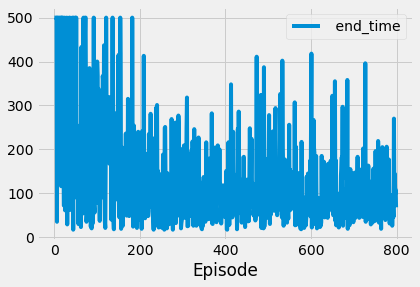

In [2]:
df = pd.read_csv("episode.csv")
#plt.style.available
#plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')
df.plot(x="Episode")

In [122]:
df = pd.read_csv("policy.csv")
df_actual = df[df["Straight"]!=0.1]
s = df_actual.sum(axis=1)
df_actual = df_actual.divide(s, axis="index")

#Isometric projection
df_actual["Left"] = df_actual["Left"]*math.sqrt(3)/2
df_actual["Right"] = df_actual["Right"]*math.sqrt(3)/2
#m = df_actual.min(axis=1)
#df_actual = df_actual.subtract(m, axis="index")
df_actual["dx"] = df_actual["Right"] - df_actual["Left"]
df_actual["dy"] = df_actual["Straight"]
#df_actual.drop("Left")
#df_actual.drop("Straight")
#df_actual.drop("Right")
df = df_actual
df.reset_index(drop=True, inplace=True)
df

,Left,Straight,Right,dx,dy
0,0.105745,0.447647,0.372606,0.266861,0.447647
1,0.033197,0.470426,0.425427,0.392230,0.470426
2,0.359752,0.441886,0.123589,-0.236164,0.441886
3,0.279112,0.326094,0.304507,0.025396,0.326094
4,0.165572,0.415148,0.340924,0.175352,0.415148
5,0.421807,0.461411,0.044624,-0.377183,0.461411


In [91]:
math.sin(math.pi)

1.2246467991473532e-16

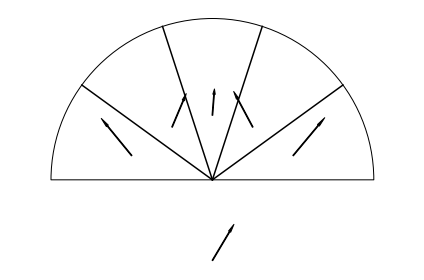

In [123]:
fig, ax = plt.subplots()
patches = []

# add a wedge
wedge = mpatches.Wedge((1, 1), 2, 0, 180, color="white", ec="black")
patches.append(wedge)

x = [2*math.cos(-math.pi/5*i)+1 for i in range(1,5)]
y = [2*math.sin(math.pi/5*i)+1 for i in range(1,5)]

for i in range(4):
    ax.plot([1,x[i]],[1,y[i]], color="black")

# add an arrow
arrow = mpatches.Arrow(1, 0, df["dx"][0], df["dy"][0], width=0.05, color="black")
patches.append(arrow)
    
for i in range(1,len(df_actual)):
    arrow = mpatches.Arrow((i-1)*0.5, 1.3 + 0.5*math.sin(math.pi/4*(i-1)), 
                           df["dx"][6-i], df["dy"][6-i], width=0.05, color="black")
    patches.append(arrow)

collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)
plt.axis('equal')
plt.axis('off')
ax.plot([] , 'bo')
plt.tight_layout()

plt.show()